In [145]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from bpca import BPCA
from vis_utils import *

In [146]:
cov = np.diag(np.array([6,5,4,3,2,1,1,1,1,1])**2)
data = np.random.multivariate_normal(np.zeros(10), cov, size=500)
bpca = BPCA()
bpca.fit(data, verbose=True, trace_elbo=True, trace_variation=True)

Iter 0, ELBO: -9501.158822, alpha: [   6.72254663    5.89746683    9.57275147    7.19908634   11.14638072
    5.35802234    3.06704052  116.54403385 2450.63361308]
Iter 100, ELBO: -2952.964530, alpha: [160.62768283 160.62757916   0.97231865   0.42516638   0.54324371
   1.61723978   0.47735046  19.79364975 160.62767684]
Iter 200, ELBO: -2928.941668, alpha: [184.67703854 184.67703854   0.9825149    0.39246812   0.50597653
   2.12023686   0.47468193 184.67703854 184.67703854]
Iter 300, ELBO: -2934.140946, alpha: [176.37527005 176.37527005   0.98245717   0.37654674   0.49758414
   3.02578276   0.48002809 176.37527005 176.37527005]
Iter 400, ELBO: -2934.324380, alpha: [188.63168984 188.63168984   0.956624     0.3771064    0.46455668
   3.30068905   0.48693507 188.63168984 188.63168984]


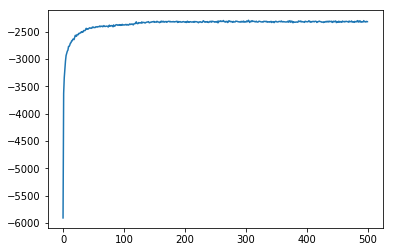

In [147]:
plt.plot(np.arange(0,500), elbos)
plt.show()

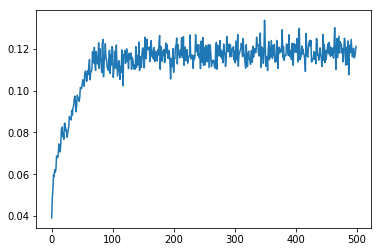

In [148]:
plt.plot(np.arange(0,500), mses)
plt.show()

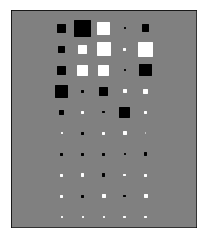

In [150]:
hinton(bpca.get_weight_matrix().T)

In [151]:
from sklearn import datasets as data
mnist = data.load_digits()
Y = mnist.target
X = mnist.images
X = X.reshape(len(X),-1)

In [152]:
from sklearn.mixture import GaussianMixture as mix
model = mix(n_components = 10, init_params='kmeans',
           n_init = 5, max_iter = 5000, covariance_type = 'diag')
model.fit(X)
preds = model.predict(X)

In [153]:
components = []
bpcas = []
means = []
for label in range(10):
    part = X[np.where(preds==label)]
    bpcas.append(BPCA())
    bpcas[label].fit(part)
    components.append(part)

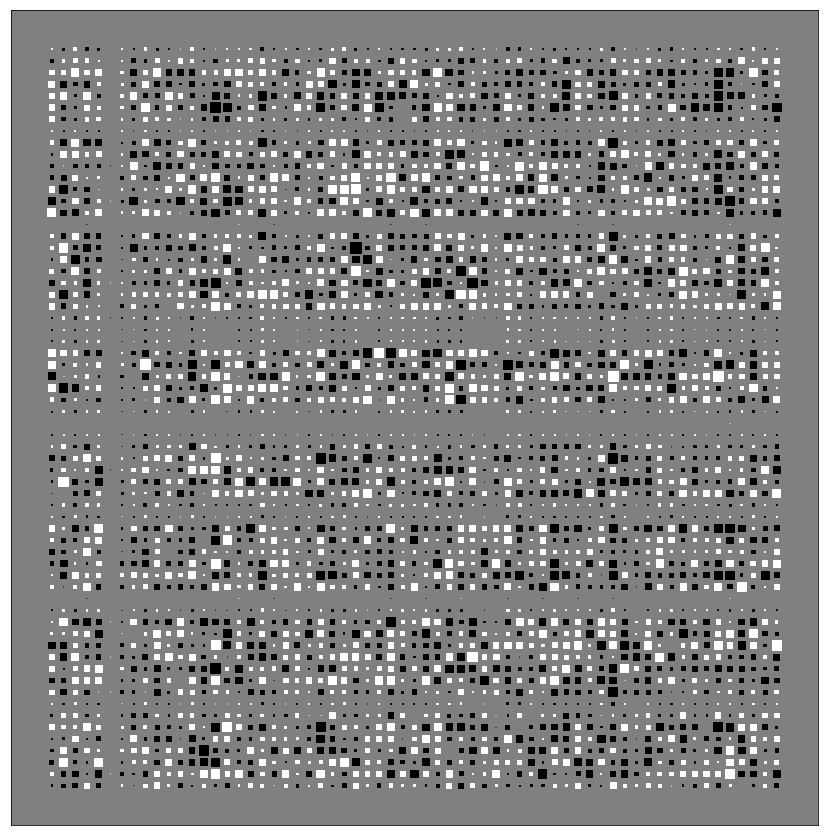

In [154]:
plt.figure(figsize=(20,15))
hinton(bpcas[1].get_weight_matrix().T)

In [156]:
bpcas[0].get_inv_variance()

array([ 1.45739935,  1.12294234,  1.80967966,  0.65054369,  8.8089599 ,
        1.08293714,  1.03127077,  1.53465859,  1.53051701,  0.83006139,
        2.6819947 ,  1.15060015, 15.7358781 ,  3.99676218,  1.16842089,
        1.04831802,  0.74786454,  8.94685991,  0.98684031,  0.63278969,
        1.44603902,  0.85845763,  1.26925322,  1.10978582,  1.47823081,
        1.24035458,  0.93962021,  0.84789729,  0.68441449,  0.81397202,
       19.8131391 ,  2.19644686,  0.96798176,  1.88909415,  3.52119848,
        2.18864016,  1.10927131,  2.08964888,  1.32231109,  3.1415017 ,
        0.87673346,  1.40184628,  1.15220684,  0.97935069,  1.03129228,
        0.70463093,  1.57288079,  1.44587611,  1.23946549,  0.89185585,
        2.06756393,  2.69371777,  2.35310395,  1.10933771,  2.99261215,
       10.57225319,  1.58814461,  5.94452524,  1.11742999,  1.24951434,
        1.52300859,  1.66562731,  1.29634928])